In [1]:
import pandas as pd
import string

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

# Read Data

In [3]:
data_file = "./emissions_and_revenue_20210625_20211104.csv"

In [4]:
data = pd.read_csv(data_file, parse_dates=[0], index_col=0)
data

,timestamp,block_number,pool_name,pool_addr,lp_token_addr,gauge_addr,gauge_relative_weight,lp_token_virtual_price,total_supply_lp_token,crv_minted_past_1d,crv_to_gauge,virtual_price_diff
2021-06-24 22:00:00,1624572000,12699406,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030511,1.017823,1.764436e+09,5.270430e+06,160805.062896,NaN
2021-07-01 22:00:00,1625176800,12744302,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.029063,1.017912,1.731845e+09,5.270430e+06,153176.715303,0.000089
2021-07-08 22:00:00,1625781600,12789307,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.027046,1.017976,1.733671e+09,5.270430e+06,142546.091241,0.000065
2021-07-15 22:00:00,1626386400,12834098,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.028084,1.018046,1.536708e+09,5.270430e+06,148015.566716,0.000070
2021-07-22 22:00:00,1626991200,12878749,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030080,1.018120,1.467889e+09,5.270430e+06,158536.154743,0.000074
2021-07-29 22:00:00,1627596000,12923235,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030036,1.018220,1.457812e+09,5.270430e+06,158301.362771,0.000099
2021-08-05 22:00:00,1628200800,12967525,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.025019,1.018337,1.439797e+09,5.270430e+06,131859.565557,0.000118
2021-08-12 22:00:00,1628805600,13012938,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.025891,1.018451,1.467864e+09,5.270430e+06,136459.087412,0.000114
2021-08-19 22:00:00,1629410400,13058324,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.023078,1.018550,1.428284e+09,4.553131e+06,105076.565343,0.000099
2021-08-26 22:00:00,1630015200,13103596,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.021880,1.018636,1.379284e+09,4.431886e+06,96969.213000,0.000086


# Plots

In [5]:
def plot_lineplot(df: pd.DataFrame, column: str, cumulative=False):

    fig, ax = plt.subplots(1,1, figsize=(20, 8))

    to_plot = df[column]
    if cumulative:
        to_plot = to_plot.cumsum()

    ax.plot(
        df.index,
        to_plot,
        color='black',
        lw=5,
        label=df.pool_name.unique()[0]
    )
    ax.set_ylabel(string.capwords(column.replace("_", " ")), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.legend(fontsize=20)
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)


def plot_barplot(df: pd.DataFrame, column: str):

    fig, ax = plt.subplots(1,1, figsize=(20, 8))

    df[column].plot(
        color='black',
        kind='bar',
        lw=5,
        label=df.pool_name.unique()[0]
    )
    ax.set_ylabel(string.capwords(column.replace("_", " ")), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.legend(fontsize=20)
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)



What about the 3pool?

In [6]:
tripool_data = data[data.pool_addr=="0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7"]
tripool_data['swap_fee_revenue'] = tripool_data.virtual_price_diff * tripool_data.total_supply_lp_token

In [7]:
tripool_data

,timestamp,block_number,pool_name,pool_addr,lp_token_addr,gauge_addr,gauge_relative_weight,lp_token_virtual_price,total_supply_lp_token,crv_minted_past_1d,crv_to_gauge,virtual_price_diff,swap_fee_revenue
2021-06-24 22:00:00,1624572000,12699406,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030511,1.017823,1.764436e+09,5.270430e+06,160805.062896,NaN,NaN
2021-07-01 22:00:00,1625176800,12744302,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.029063,1.017912,1.731845e+09,5.270430e+06,153176.715303,0.000089,153953.045308
2021-07-08 22:00:00,1625781600,12789307,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.027046,1.017976,1.733671e+09,5.270430e+06,142546.091241,0.000065,112072.011307
2021-07-15 22:00:00,1626386400,12834098,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.028084,1.018046,1.536708e+09,5.270430e+06,148015.566716,0.000070,107415.604833
2021-07-22 22:00:00,1626991200,12878749,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030080,1.018120,1.467889e+09,5.270430e+06,158536.154743,0.000074,108847.631596
2021-07-29 22:00:00,1627596000,12923235,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.030036,1.018220,1.457812e+09,5.270430e+06,158301.362771,0.000099,144617.746302
2021-08-05 22:00:00,1628200800,12967525,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.025019,1.018337,1.439797e+09,5.270430e+06,131859.565557,0.000118,169517.488554
2021-08-12 22:00:00,1628805600,13012938,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.025891,1.018451,1.467864e+09,5.270430e+06,136459.087412,0.000114,166863.856511
2021-08-19 22:00:00,1629410400,13058324,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.023078,1.018550,1.428284e+09,4.553131e+06,105076.565343,0.000099,141800.056675
2021-08-26 22:00:00,1630015200,13103596,Curve.fi DAI/USDC/USDT,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490,0xbFcF63294aD7105dEa65aA58F8AE5BE2D9d0952A,0.021880,1.018636,1.379284e+09,4.431886e+06,96969.213000,0.000086,118498.885797


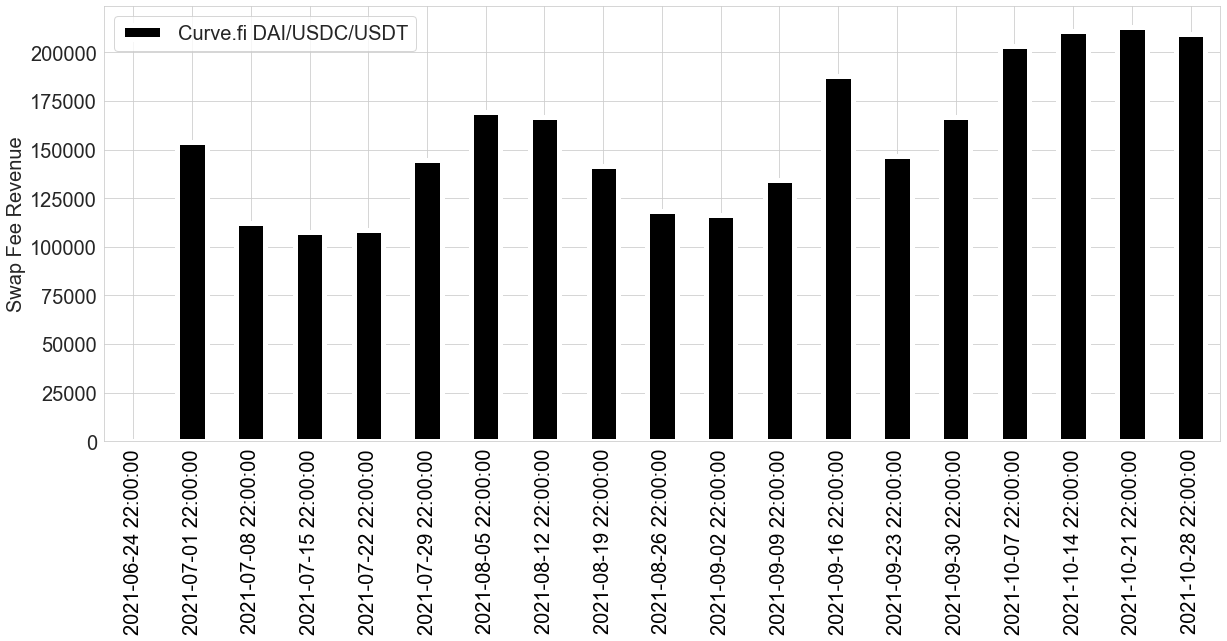

In [8]:
plot_barplot(tripool_data, column='swap_fee_revenue')

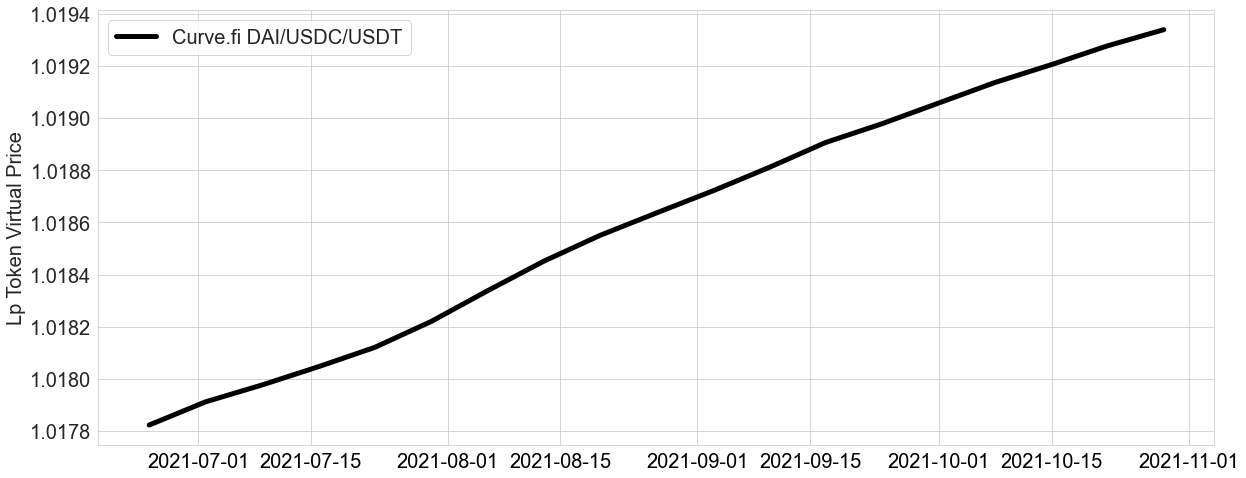

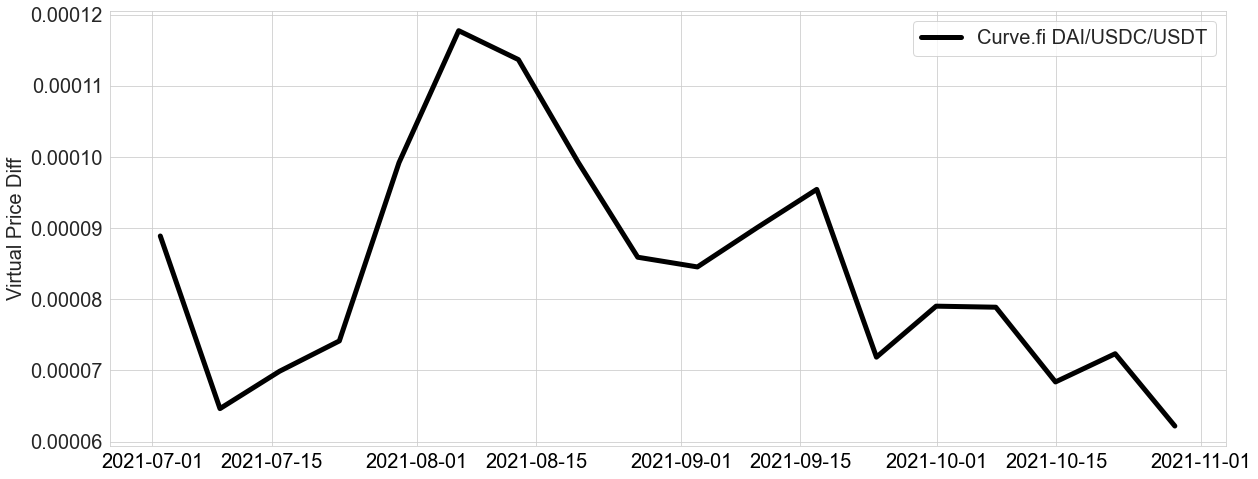

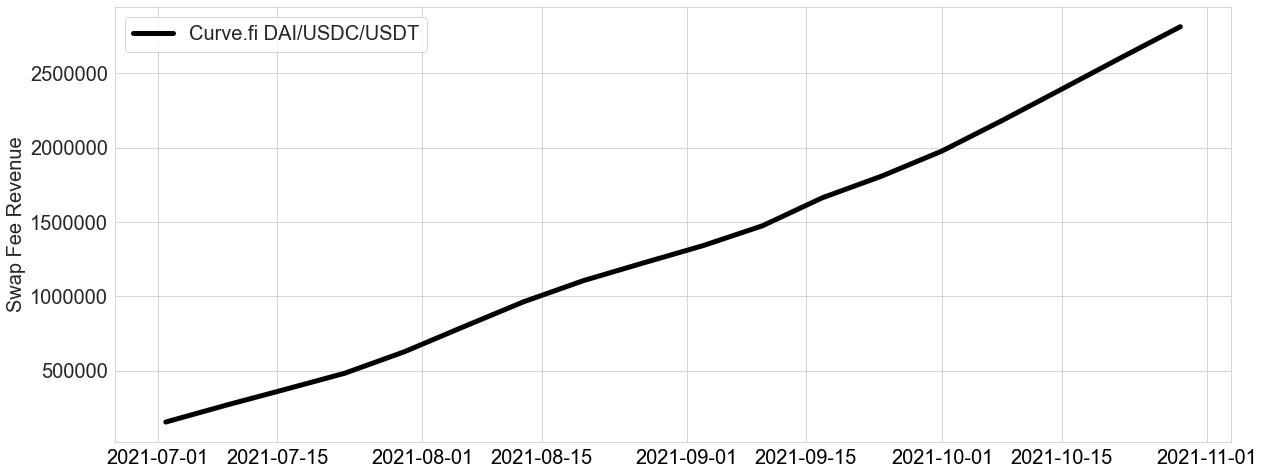

In [9]:
plot_lineplot(tripool_data, column='lp_token_virtual_price')
plot_lineplot(tripool_data, column='virtual_price_diff')
plot_lineplot(tripool_data, column='swap_fee_revenue', cumulative=True)

usdn pool:

In [10]:
usdn_data = data[data.pool_addr=="0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1"]
usdn_data['swap_fee_revenue'] = usdn_data.virtual_price_diff * tripool_data.total_supply_lp_token
usdn_data

,timestamp,block_number,pool_name,pool_addr,lp_token_addr,gauge_addr,gauge_relative_weight,lp_token_virtual_price,total_supply_lp_token,crv_minted_past_1d,crv_to_gauge,virtual_price_diff,swap_fee_revenue
2021-06-24 22:00:00,1624572000,12699406,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.134197,1.030940,5.627110e+08,5.270430e+06,707277.038120,NaN,NaN
2021-07-01 22:00:00,1625176800,12744302,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.128277,1.031422,5.663490e+08,5.270430e+06,676075.223567,0.000483,8.356409e+05
2021-07-08 22:00:00,1625781600,12789307,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.130238,1.031807,5.925849e+08,5.270430e+06,686410.078913,0.000385,6.666391e+05
2021-07-15 22:00:00,1626386400,12834098,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.127589,1.032265,5.819403e+08,5.270430e+06,672450.339207,0.000459,7.049731e+05
2021-07-22 22:00:00,1626991200,12878749,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.136702,1.032666,5.488982e+08,5.270430e+06,720477.588054,0.000400,5.876561e+05
2021-07-29 22:00:00,1627596000,12923235,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.135905,1.033049,5.688823e+08,5.270430e+06,716276.129533,0.000383,5.585423e+05
2021-08-05 22:00:00,1628200800,12967525,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.130587,1.033506,5.822297e+08,5.270430e+06,688249.469197,0.000457,6.583021e+05
2021-08-12 22:00:00,1628805600,13012938,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.127002,1.033948,6.401141e+08,5.270430e+06,669356.116220,0.000442,6.492974e+05
2021-08-19 22:00:00,1629410400,13058324,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.112639,1.034499,6.281446e+08,4.553131e+06,512860.868931,0.000551,7.862984e+05
2021-08-26 22:00:00,1630015200,13103596,Curve.fi USDN/3Crv,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,0xF98450B5602fa59CC66e1379DFfB6FDDc724CfC4,0.108156,1.035053,6.807696e+08,4.431886e+06,479334.038407,0.000554,7.646043e+05


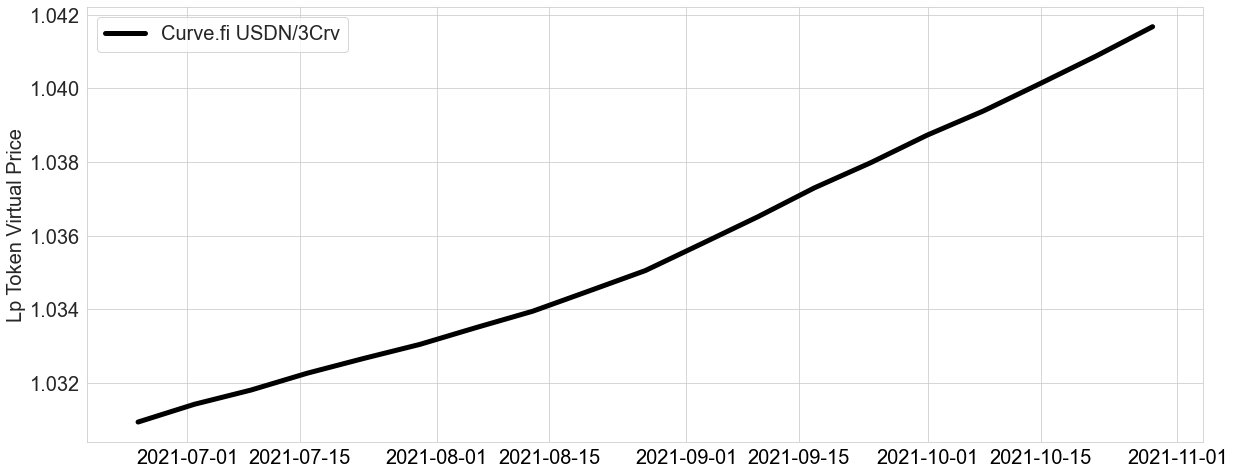

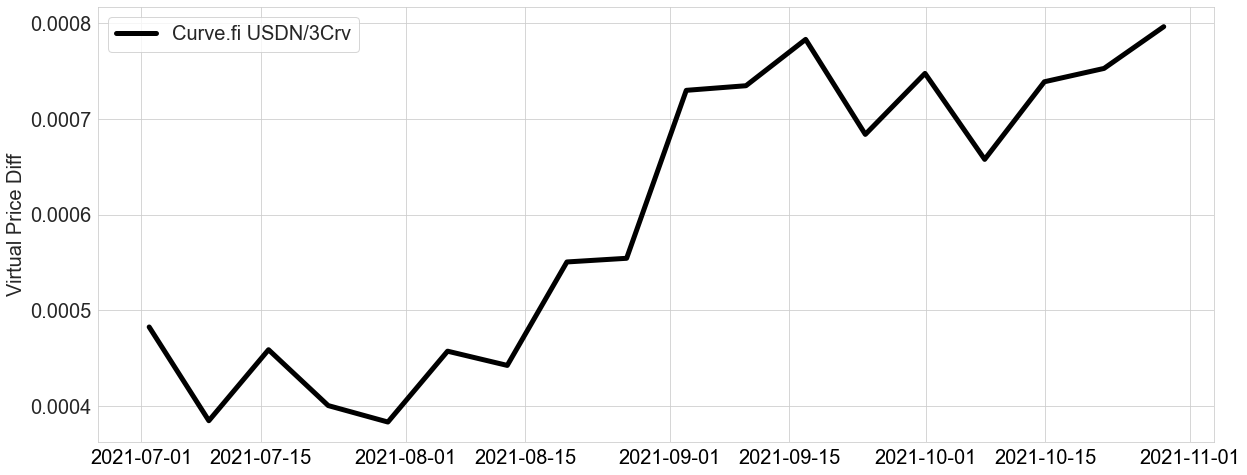

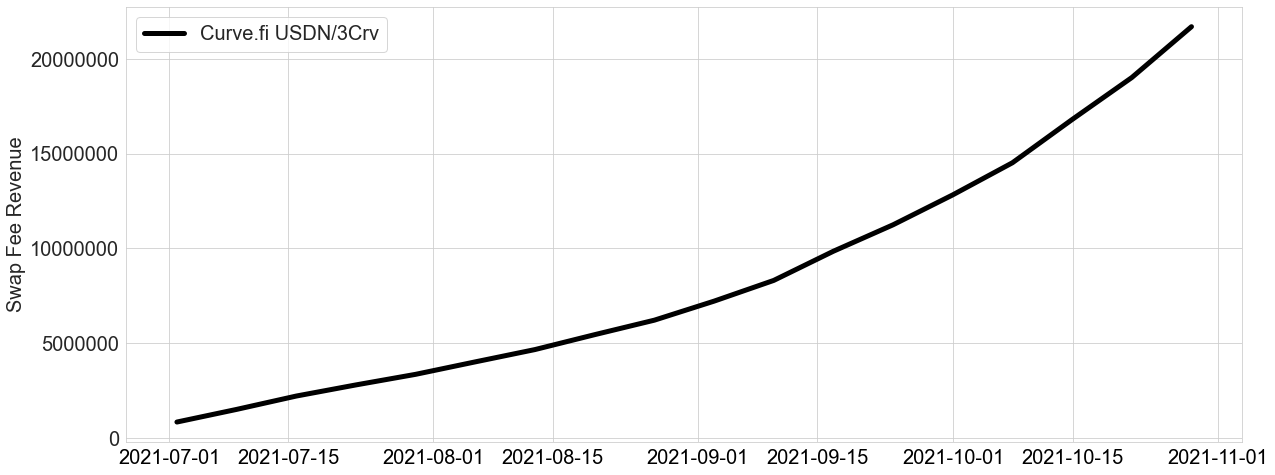

In [12]:
plot_lineplot(usdn_data, column='lp_token_virtual_price')
plot_lineplot(usdn_data, column='virtual_price_diff')
plot_lineplot(usdn_data, column='swap_fee_revenue', cumulative=True)

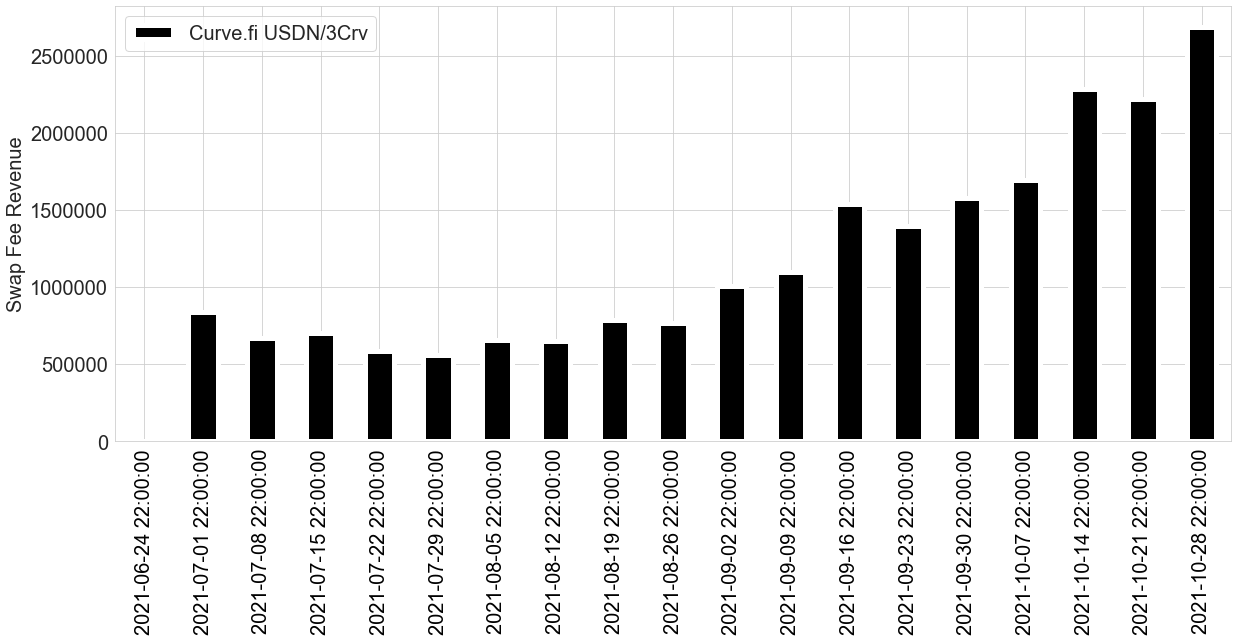

In [13]:
plot_barplot(usdn_data, column='swap_fee_revenue')

In [14]:
tripool_data.to_csv("tripool.csv")
usdn_data.to_csv("usdn.csv")